# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

# Conjunto de datos de ejemplo

In [33]:
from src import ajustar_min_cuadrados
import numpy as np
import matplotlib.pyplot as plt

## Conjunto de datos 1

In [34]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

[01-18 10:09:07][INFO] Se ajustarán 3 parámetros.
[01-18 10:09:07][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-18 10:09:07][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


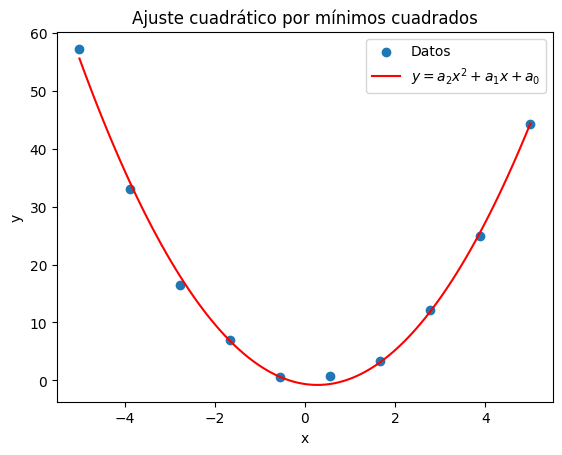

In [35]:
def der_parcial_2(xs, ys):
    return [sum(x**4 for x in xs), sum(x**3 for x in xs), sum(x**2 for x in xs), sum(y * x**2 for x, y in zip(xs, ys))]

def der_parcial_1(xs, ys):
    return [sum(x**3 for x in xs), sum(x**2 for x in xs), sum(x for x in xs), sum(y * x for x, y in zip(xs, ys))]

def der_parcial_0(xs, ys):
    return [sum(x**2 for x in xs), sum(x for x in xs), len(xs), sum(ys)]


a2, a1, a0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0])

x_cuad = np.linspace(-5, 5, 100)
y_cuad = [a2 * xi**2 + a1 * xi + a0 for xi in x_cuad]

plt.scatter(xs1, ys1, label="Datos")
plt.plot(x_cuad, y_cuad, color="red", label=r"$y = a_2 x^2 + a_1 x + a_0$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados")
plt.legend()
plt.show()

## Conjunto de datos 2

In [36]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

[01-18 10:09:12][INFO] Se ajustarán 2 parámetros.
[01-18 10:09:12][INFO] 
[[20.         22.0372     19.05727035]
 [ 0.         10.54683259 14.94655314]]


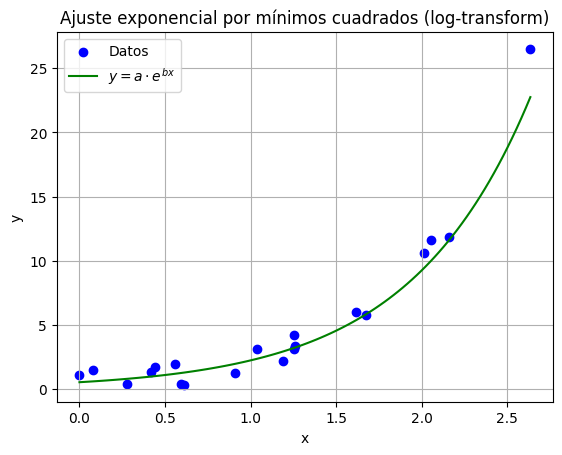

In [37]:
def der_parcial_a(xs, ys):
    ys_log = np.log(ys)  
    return [
        len(xs), 
        sum(xs),  
        sum(ys_log), 
    ]

def der_parcial_b(xs, ys):
    ys_log = np.log(ys)
    return [
        sum(xs),
        sum(x**2 for x in xs),
        sum(x * y for x, y in zip(xs, ys_log)),
    ]

A_prime, b = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_a, der_parcial_b])
a = np.exp(A_prime) 

x_exp = np.linspace(min(xs2), max(xs2), 100)
y_exp = [a * np.exp(b * xi) for xi in x_exp]

plt.scatter(xs2, ys2, label="Datos", color="blue")
plt.plot(x_exp, y_exp, color="green", label=r"$y = a \cdot e^{b x}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados (log-transform)")
plt.legend()
plt.grid()
plt.show()